In [1]:
import js

# Access the navigator object to get browser information
user_agent = js.navigator.userAgent
platform = js.navigator.platform
language = js.navigator.language

# Print browser information
print("User Agent:", user_agent)
print()
print("Platform:", platform)
print()
print("Language:", language)
print()




User Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/127.0.0.0 Safari/537.36

Platform: Win32

Language: en-US



In [2]:
import piplite
await piplite.install("ase")
await piplite.install("intermat")

In [3]:
from ase.build.supercells import make_supercell
import numpy as np
import time
import matplotlib.pyplot as plt
from ase import Atoms,Atom
from ase.calculators.emt import EMT
calc = EMT()
a = 3.6
atoms = Atoms([Atom('Cu', (0, 0, 0))],
              cell=0.5 * a * np.array([[1.0, 1.0, 0.0],
                                       [0.0, 1.0, 1.0],
                                       [1.0, 0.0, 1.0]]),
             pbc=True)

numbers = np.arange(1,23,1)
times = []
natoms=[]
for i in numbers:

  sc=make_supercell(atoms, [[i,0,0],[0,i,0],[0,0,i]])
  t1=time.time()
  sc.calc = calc

  en = sc.get_potential_energy()/len(sc)
  t2=time.time()

  times.append(t2-t1)
  natoms.append(len(sc))
  print(i,len(sc), en,t2-t1)

1 1 -0.00668876868578927 0.06400012969970703
2 8 -0.006688768685788826 0.05800008773803711
3 27 -0.006688768685786441 0.09800004959106445
4 64 -0.0066887686857904916 0.09800028800964355
5 125 -0.006688768685789838 0.127000093460083
6 216 -0.006688768685791746 0.21799969673156738
7 343 -0.00668876868579359 0.3450000286102295
8 512 -0.006688768685793104 0.4440000057220459
9 729 -0.006688768685793347 0.6299998760223389
10 1000 -0.006688768685793123 0.7980000972747803
11 1331 -0.006688768685793172 1.0490002632141113
12 1728 -0.006688768685792912 1.3029999732971191
13 2197 -0.006688768685792768 1.559000015258789
14 2744 -0.006688768685793417 1.9029998779296875
15 3375 -0.006688768685792879 2.3610002994537354
16 4096 -0.006688768685792844 2.8340001106262207
17 4913 -0.006688768685792901 3.441999912261963
18 5832 -0.006688768685792769 3.996999979019165
19 6859 -0.006688768685792853 4.778000116348267
20 8000 -0.006688768685793156 5.3999998569488525
21 9261 -0.006688768685793315 6.3889999389648

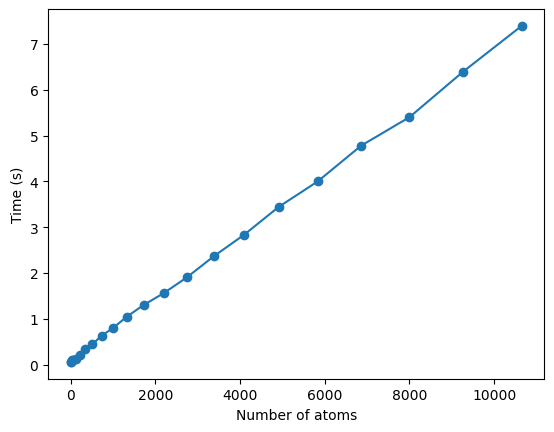

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(natoms,times,'o-')
plt.xlabel('Number of atoms')
plt.ylabel('Time (s)')
plt.show()